In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Events

In [27]:
df_events = pd.read_csv('event_streams/events_germany.csv')
df_events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85.0,179896442,[1801],50,50,48,50
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85.0,179896443,[1801],48,50,22,22
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85.0,179896444,[1801],22,22,46,6
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85.0,179896445,[1801],46,6,10,20
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85.0,179896446,[1801],10,20,4,27


In [28]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519357 entries, 0 to 519356
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       519357 non-null  int64  
 1   subEventName  518138 non-null  object 
 2   tags          519357 non-null  object 
 3   playerId      519357 non-null  int64  
 4   positions     519357 non-null  object 
 5   matchId       519357 non-null  int64  
 6   eventName     519357 non-null  object 
 7   teamId        519357 non-null  int64  
 8   matchPeriod   519357 non-null  object 
 9   eventSec      519357 non-null  float64
 10  subEventId    518138 non-null  float64
 11  id            519357 non-null  int64  
 12  tagsList      468651 non-null  object 
 13  pos_orig_y    519357 non-null  int64  
 14  pos_orig_x    519357 non-null  int64  
 15  pos_dest_y    519357 non-null  int64  
 16  pos_dest_x    519357 non-null  int64  
dtypes: float64(2), int64(9), object(6)
memory usage:

#### Remove missing values

In [29]:
df_events = df_events.dropna()

In [30]:
df_events.describe()

,eventId,playerId,matchId,teamId,eventSec,subEventId,id,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
count,468629.000000,468629.000000,4.686290e+05,468629.000000,468629.000000,468629.000000,4.686290e+05,468629.000000,468629.000000,468629.000000,468629.000000
mean,5.532451,100418.627428,2.516892e+06,2486.001451,1380.439043,58.520986,2.170867e+08,49.979395,50.003433,49.946510,50.163249
std,3.254205,122814.497836,8.761879e+01,123.460432,829.508380,33.698653,2.085316e+07,31.010909,25.722089,31.040733,25.774219
min,1.000000,0.000000,2.516739e+06,2443.000000,0.009600,10.000000,1.798964e+08,0.000000,0.000000,0.000000,0.000000
25%,1.000000,14938.000000,2.516817e+06,2447.000000,655.787946,12.000000,1.987561e+08,23.000000,31.000000,23.000000,31.000000
50%,8.000000,20402.000000,2.516893e+06,2453.000000,1365.637283,83.000000,2.206204e+08,50.000000,49.000000,50.000000,50.000000
75%,8.000000,209091.000000,2.516968e+06,2462.000000,2095.406581,85.000000,2.334244e+08,77.000000,69.000000,77.000000,69.000000
max,10.000000,520617.000000,2.517044e+06,2975.000000,3537.356061,100.000000,2.526700e+08,101.000000,100.000000,101.000000,100.000000


#### Main Events

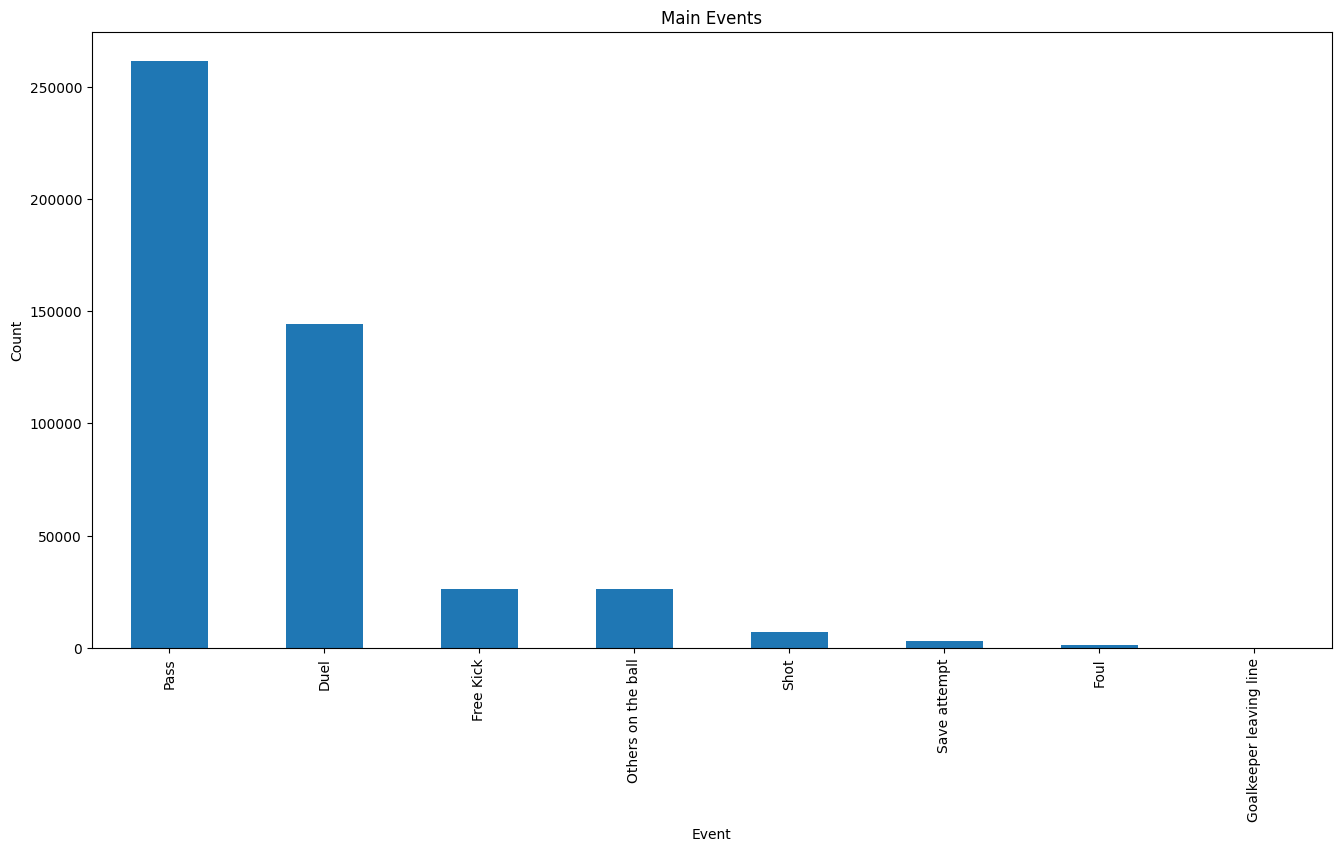

In [31]:
# Plot number of performed actions interesting, zipfs law also lives in football actions :)
plt.figure(figsize=(16, 8))
df_events['eventName'].value_counts().plot.bar()
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Main Events')
plt.show()

In [32]:
print(df_events['eventName'].value_counts())

eventName
Pass                       261436
Duel                       144168
Free Kick                   26238
Others on the ball          25963
Shot                         6896
Save attempt                 2810
Foul                         1083
Goalkeeper leaving line        35
Name: count, dtype: int64


#### Sub Events

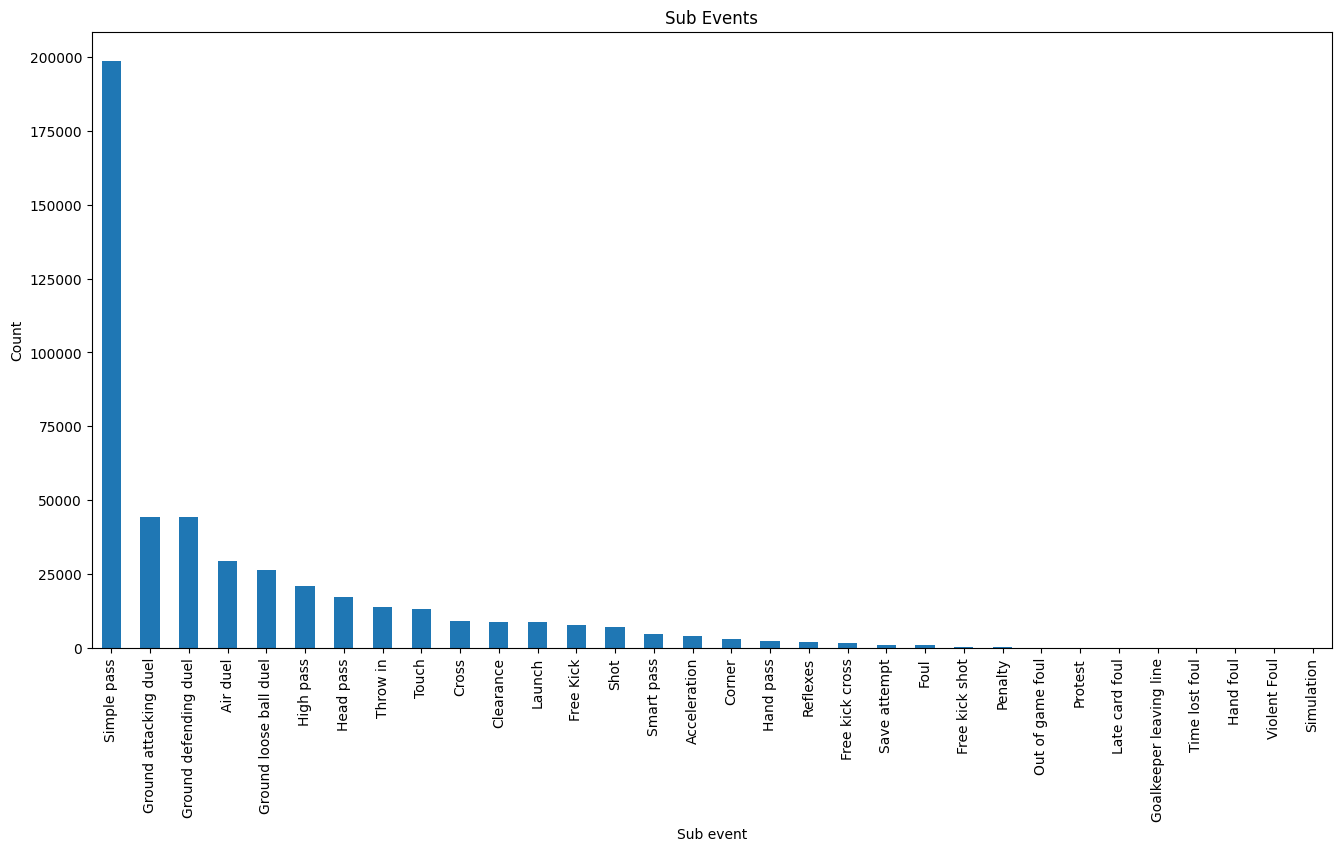

In [33]:
# Plot number of performed actions interesting, zipfs law also lives in football actions :)
plt.figure(figsize=(16, 8))
df_events['subEventName'].value_counts().plot.bar()
plt.xlabel('Sub event')
plt.ylabel('Count')
plt.title('Sub Events')
plt.show()

In [34]:
print(df_events['subEventName'].value_counts())

subEventName
Simple pass                198711
Ground attacking duel       44339
Ground defending duel       44161
Air duel                    29442
Ground loose ball duel      26226
High pass                   20857
Head pass                   17083
Throw in                    13682
Touch                       13207
Cross                        9031
Clearance                    8796
Launch                       8714
Free Kick                    7747
Shot                         6896
Smart pass                   4622
Acceleration                 3960
Corner                       2891
Hand pass                    2418
Reflexes                     1814
Free kick cross              1526
Save attempt                  996
Foul                          845
Free kick shot                299
Penalty                        93
Out of game foul               67
Protest                        65
Late card foul                 42
Goalkeeper leaving line        35
Time lost foul                 32
H